# Setting up the 'Kaggle' CLI and dowloading the dataset

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
_ = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d harlfoxem/housesalesprediction

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 91.1MB/s]


In [5]:
!ls

housesalesprediction.zip  kaggle.json  sample_data


In [6]:
! unzip housesalesprediction.zip

Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [7]:
!ls

housesalesprediction.zip  kaggle.json  kc_house_data.csv  sample_data


##Importing the necessary libraries and dataset


In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline



In [9]:
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='g', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq=n.max()


# Data Cleaning

In [10]:
pd.set_option('display.float_format',lambda x: '%.3f' % x)
train_data = pd.read_csv('kc_house_data.csv')


In [11]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [12]:
train_data.price

0       221900.000
1       538000.000
2       180000.000
3       604000.000
4       510000.000
           ...    
21608   360000.000
21609   400000.000
21610   402101.000
21611   400000.000
21612   325000.000
Name: price, Length: 21613, dtype: float64

In [13]:
train_data.shape

(21613, 21)

In [14]:
train_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

the dataset has 21613 rows but the number of unique ids are 15887 so , checking for duplicated values

In [15]:
train_data.duplicated().sum()

0

In [16]:
IDCount=train_data.groupby('id')['yr_built','zipcode'].count()
IDCount[0:10]

<ipython-input-16-b522fcdbde9c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  IDCount=train_data.groupby('id')['yr_built','zipcode'].count()


,yr_built,zipcode
id,,
1000102,2,2
1200019,1,1
1200021,1,1
2800031,1,1
3600057,1,1
3600072,1,1
3800008,1,1
5200087,1,1
6200017,1,1


In [17]:
train_data.loc[train_data['id'] == 1000102]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2496,1000102,20140916T000000,280000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316
2497,1000102,20150422T000000,300000.000,6,3.000,2400,9373,2.000,0,0,...,7,2400,0,1991,0,98002,47.326,-122.214,2060,7316


hence ,it is clear that few number of homes are sold multiple times

In [18]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

the dataset is pretty clean

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data analysis and Data visualisation

In [20]:
train_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,4580301520.865,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,1971.005,84.402,98077.940,47.560,-122.214,1986.552,12768.456
std,2876565571.312,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,29.373,401.679,53.505,0.139,0.141,685.391,27304.180
min,1000102.000,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049194.000,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7308900445.000,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


<Axes: xlabel='bedrooms', ylabel='price'>

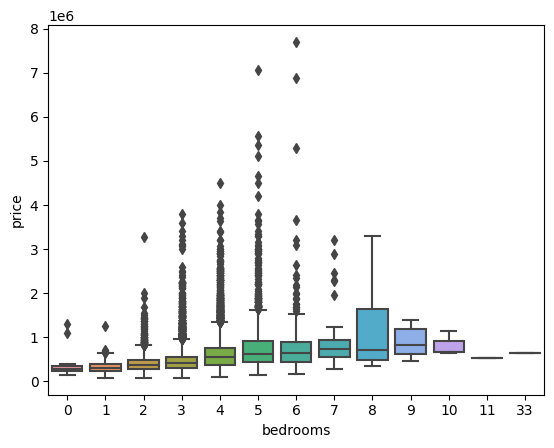

In [21]:
sns.boxplot(x = train_data['bedrooms'],y =train_data['price'])

In [22]:
train_data.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

<Axes: xlabel='grade', ylabel='bathrooms'>

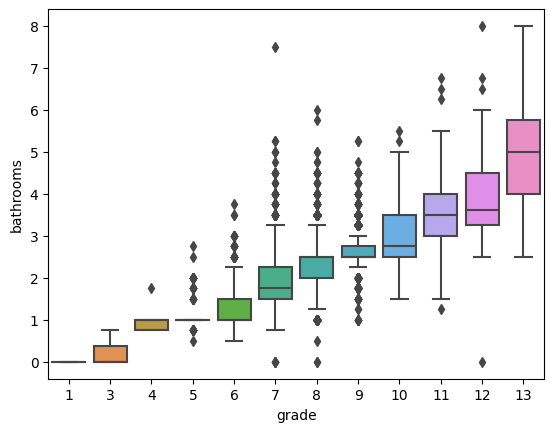

In [23]:
sns.boxplot(x=train_data['grade'], y= train_data['bathrooms'])

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

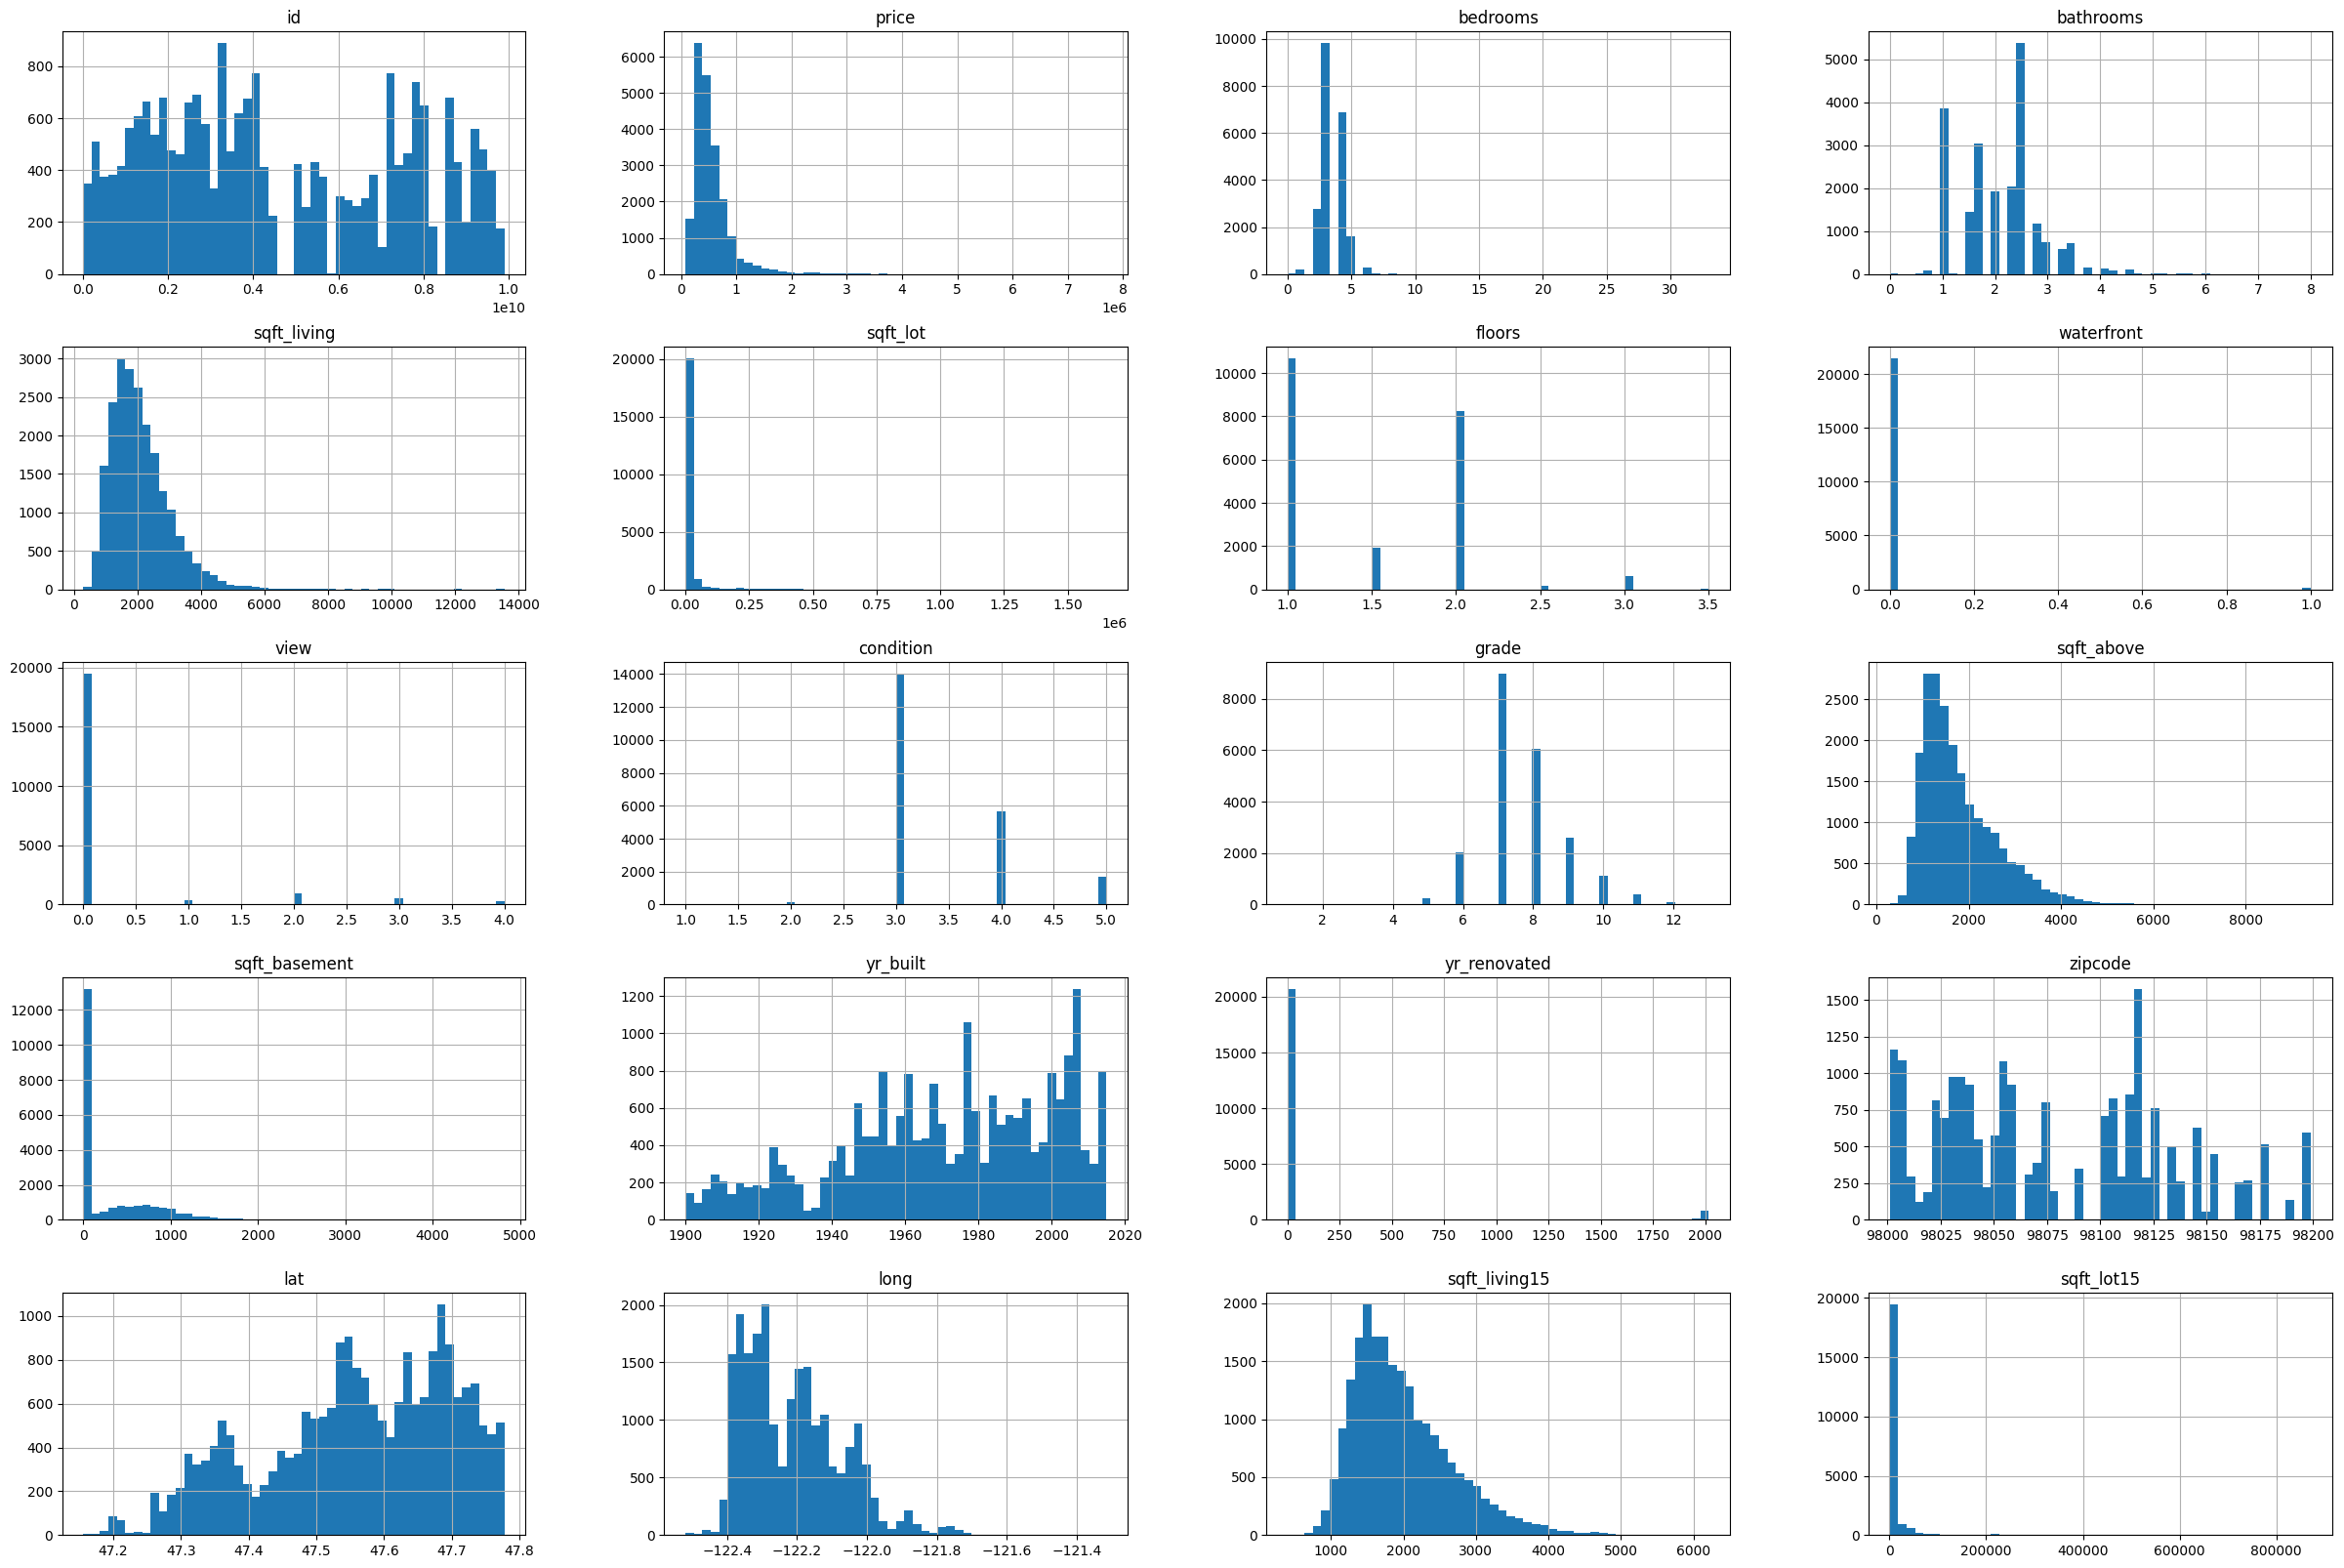

In [24]:
train_data.hist(bins=50,figsize=(30,20))


## From above statistics we can analyse the dataset


#Conclusions from above histograms
Most of the houses in the dataset have 3 bedrooms
2] Most of the houses have condition 3 and have only 1 floor
3] Most of the houses have grade=7
4] The histograms of Price and sqft_living are right-skewed.

the orice has apreciable positive skewness,deviates from the normal distrubution.
log transformation to make the scale numeric  

Text(0.5, 0, 'price')

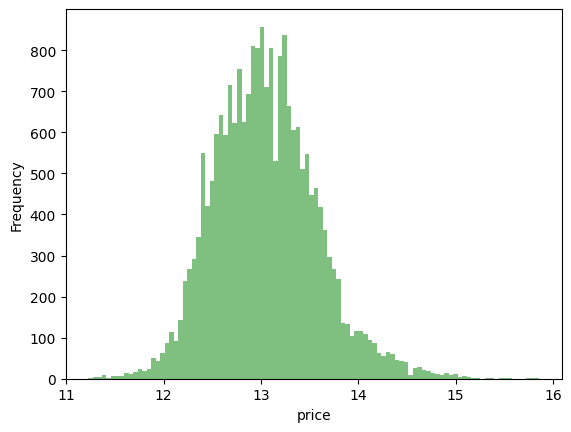

In [25]:
train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [26]:
train_data.price.describe()

count   21613.000
mean       13.048
std         0.527
min        11.225
25%        12.682
50%        13.017
75%        13.377
max        15.857
Name: price, dtype: float64

#Computing new columns clumns
calculating the age of house by taking the difference between year_sold and year_built

In [27]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
train_data['year_sold']=train_data['date'].apply(lambda x:int(x[:4]))
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)


In [29]:
train_data['is_renovated']= train_data['yr_renovated'].apply(lambda x:0 if x==0 else 1)

# Remove the columns date,yr_built as we have used them to calculate new column


In [30]:
train_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,is_renovated
0,7129300520,20141013T000000,12.310,3,1.000,1180,5650,1.000,0,0,...,1955,0,98178,47.511,-122.257,1340,5650,2014,59,0
1,6414100192,20141209T000000,13.196,3,2.250,2570,7242,2.000,0,0,...,1951,1991,98125,47.721,-122.319,1690,7639,2014,63,1
2,5631500400,20150225T000000,12.101,2,1.000,770,10000,1.000,0,0,...,1933,0,98028,47.738,-122.233,2720,8062,2015,82,0
3,2487200875,20141209T000000,13.311,4,3.000,1960,5000,1.000,0,0,...,1965,0,98136,47.521,-122.393,1360,5000,2014,49,0
4,1954400510,20150218T000000,13.142,3,2.000,1680,8080,1.000,0,0,...,1987,0,98074,47.617,-122.045,1800,7503,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,12.794,3,2.500,1530,1131,3.000,0,0,...,2009,0,98103,47.699,-122.346,1530,1509,2014,5,0
21609,6600060120,20150223T000000,12.899,4,2.500,2310,5813,2.000,0,0,...,2014,0,98146,47.511,-122.362,1830,7200,2015,1,0
21610,1523300141,20140623T000000,12.904,2,0.750,1020,1350,2.000,0,0,...,2009,0,98144,47.594,-122.299,1020,2007,2014,5,0
21611,291310100,20150116T000000,12.899,3,2.500,1600,2388,2.000,0,0,...,2004,0,98027,47.535,-122.069,1410,1287,2015,11,0


In [31]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1 ,inplace = True)

In [32]:
train_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'house_age', 'is_renovated'],
      dtype='object')

# Feature Selection


Unnecessary features decrease training speed, decrease model interpretability, and, most importantly, decrease generalization performance on the test set.



In [33]:
train_data.shape

(21613, 20)

<Axes: >

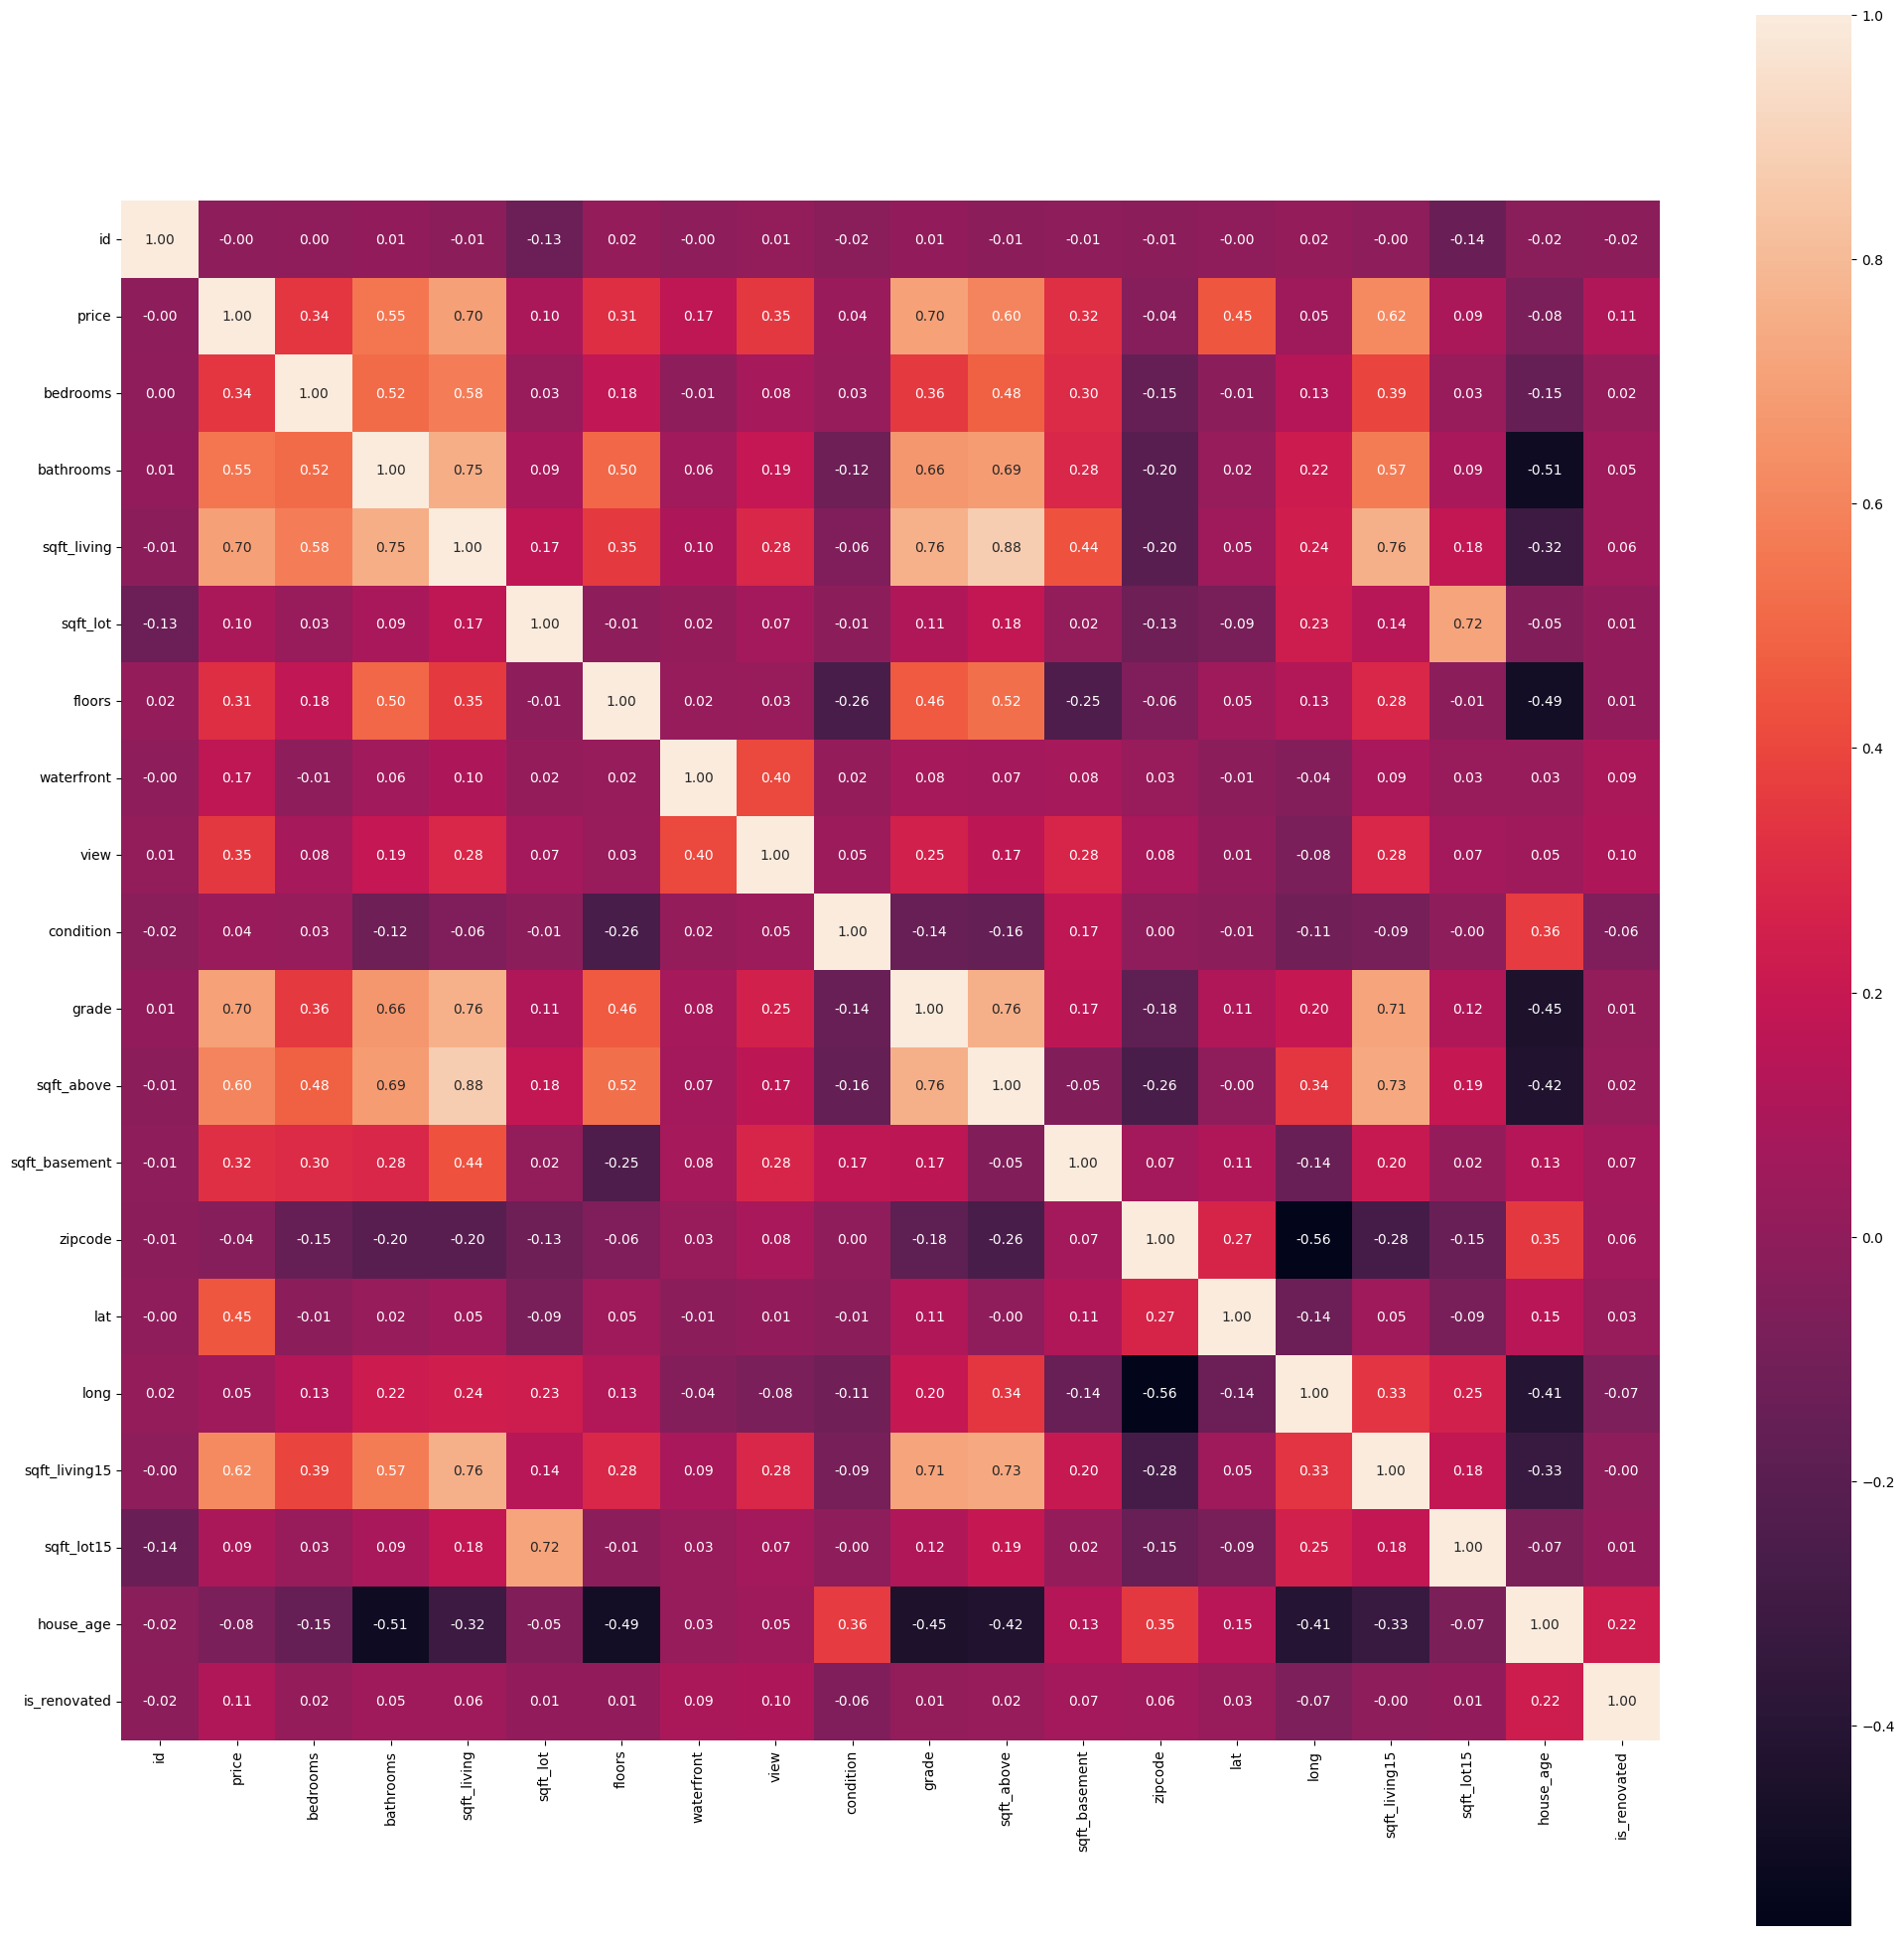

In [34]:
corrmat=train_data.corr()
fig,ax=plt.subplots()
fig.set_size_inches(25,25)
sns.heatmap(corrmat,square=True,annot=True,fmt='.2f')


Converting zipcodes into categories

In [35]:
train_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated
0,7129300520,12.310,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,98178,47.511,-122.257,1340,5650,59,0
1,6414100192,13.196,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,98125,47.721,-122.319,1690,7639,63,1
2,5631500400,12.101,2,1.000,770,10000,1.000,0,0,3,6,770,0,98028,47.738,-122.233,2720,8062,82,0
3,2487200875,13.311,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,98136,47.521,-122.393,1360,5000,49,0
4,1954400510,13.142,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,98074,47.617,-122.045,1800,7503,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,12.794,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,98103,47.699,-122.346,1530,1509,5,0
21609,6600060120,12.899,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,98146,47.511,-122.362,1830,7200,1,0
21610,1523300141,12.904,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,98144,47.594,-122.299,1020,2007,5,0
21611,291310100,12.899,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,98027,47.535,-122.069,1410,1287,11,0


In [36]:
train_data = pd.get_dummies(train_data,columns=['zipcode'])

In [37]:
corr_matrix=train_data.corr()
cor_target=abs(corr_matrix["price"].sort_values(ascending=False))
cor_target

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
                 ... 
zipcode_98002   0.130
zipcode_98042   0.138
zipcode_98001   0.138
zipcode_98168   0.150
zipcode_98023   0.156
Name: price, Length: 89, dtype: float64

In [38]:
train_data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,12.310,3,1.000,1180,5650,1.000,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,13.196,3,2.250,2570,7242,2.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,12.101,2,1.000,770,10000,1.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,13.311,4,3.000,1960,5000,1.000,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,13.142,3,2.000,1680,8080,1.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,12.794,3,2.500,1530,1131,3.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,12.899,4,2.500,2310,5813,2.000,0,0,3,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,12.904,2,0.750,1020,1350,2.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,12.899,3,2.500,1600,2388,2.000,0,0,3,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


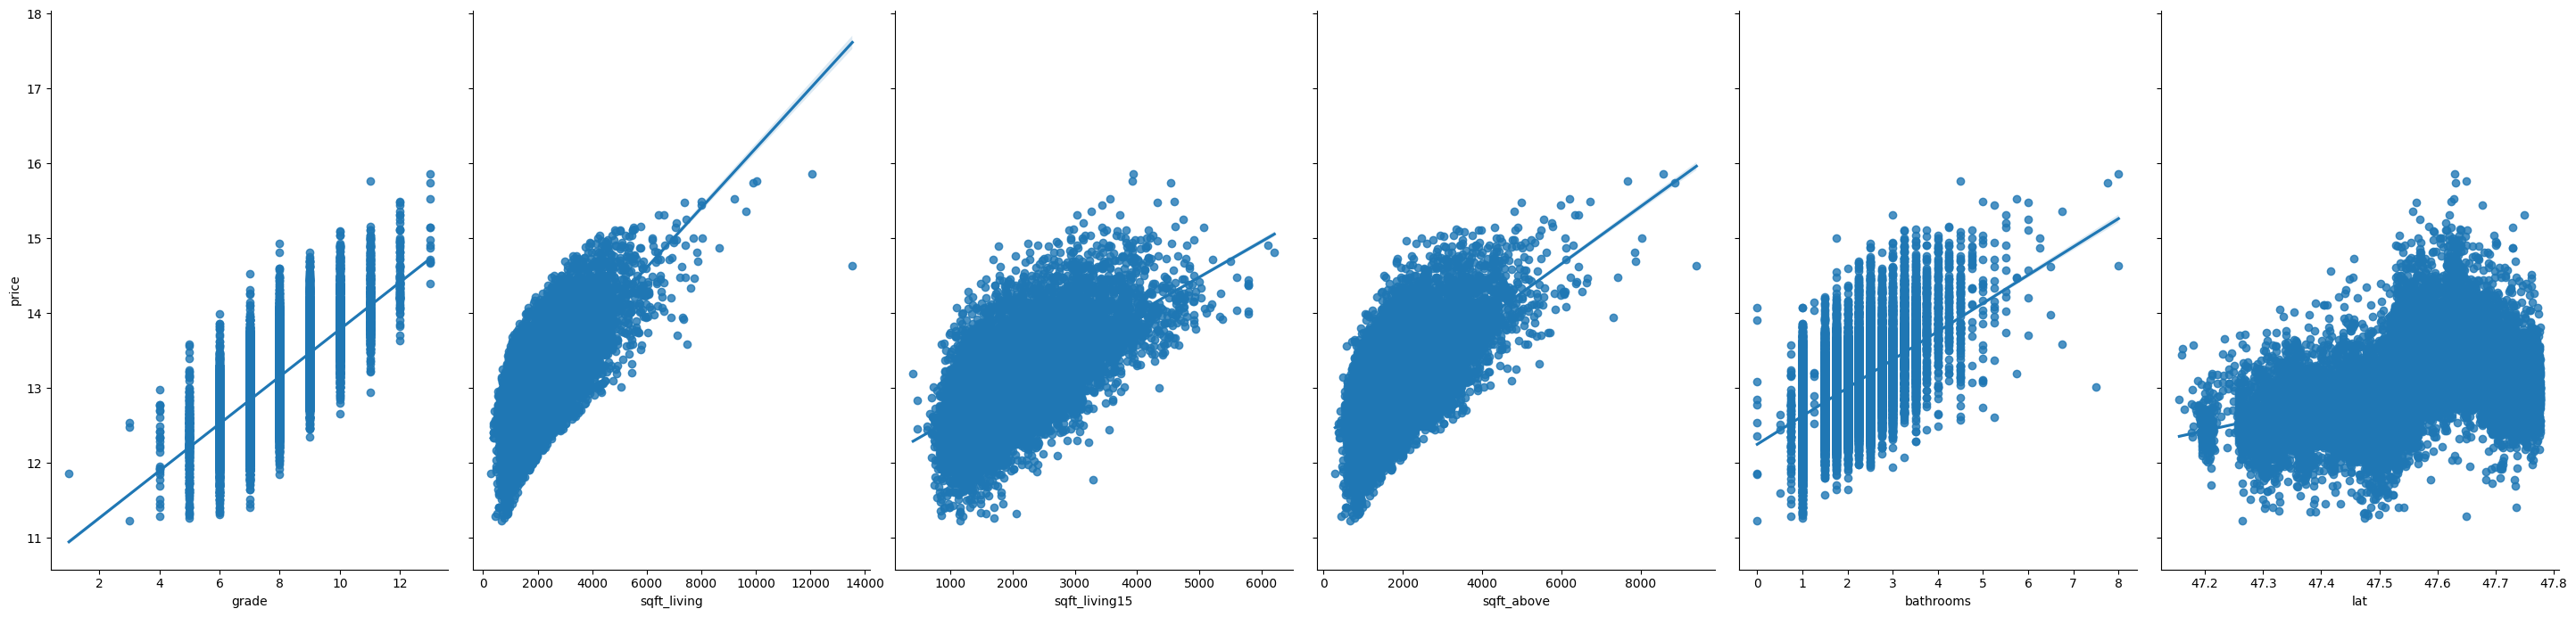

In [39]:
sns.pairplot(train_data,x_vars=['grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat'],y_vars='price', size=7, aspect=0.7, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


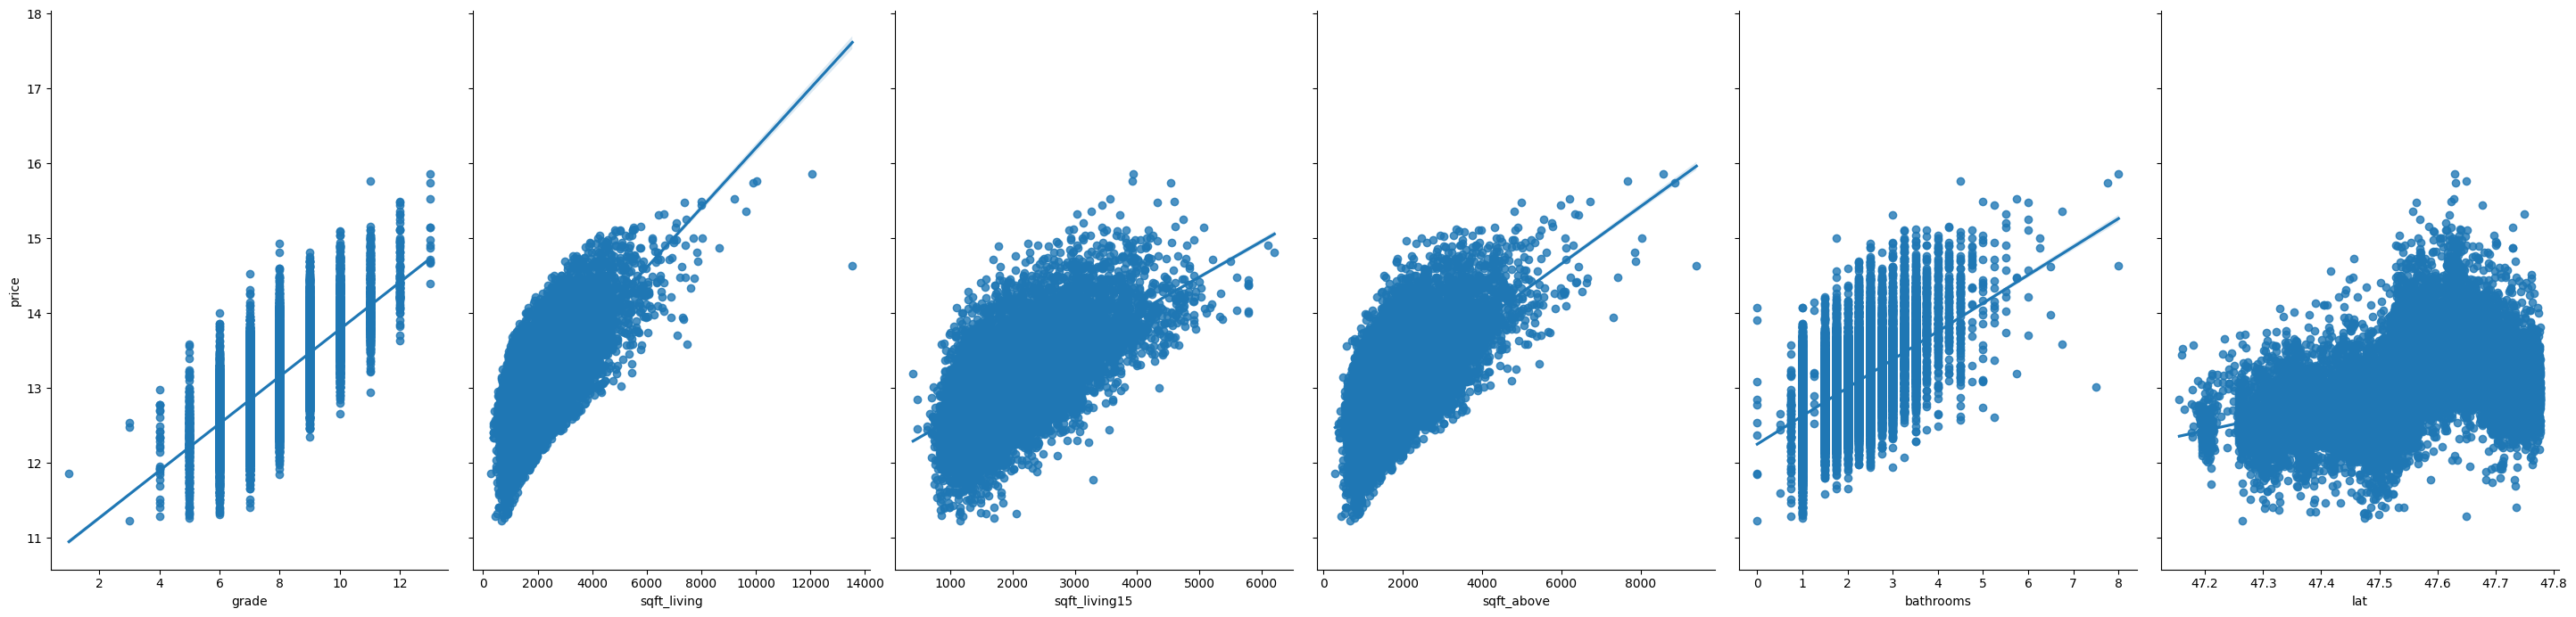

In [40]:
sns.pairplot(train_data,x_vars=['grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat'],y_vars='price', size=7, aspect=0.7, kind='reg')

In [42]:
relevent_features=cor_target[cor_target>0.3]
relevent_features

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
lat             0.449
view            0.347
bedrooms        0.344
sqft_basement   0.317
floors          0.311
Name: price, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


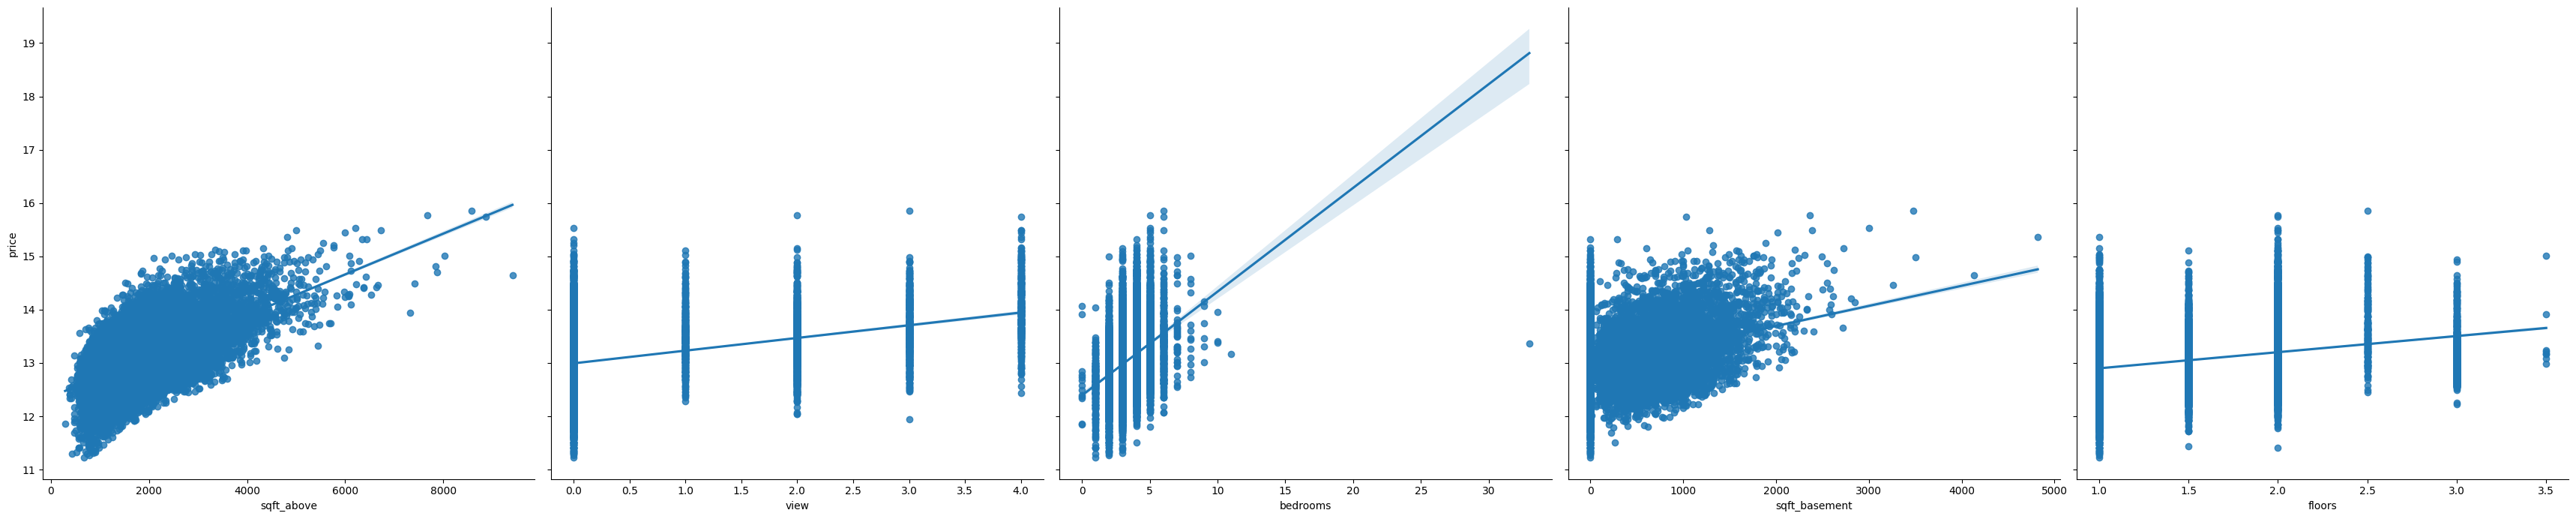

In [46]:
sns.pairplot(train_data,x_vars=['sqft_above','view','bedrooms','sqft_basement','floors'],y_vars='price',size=7,kind='reg')

In [48]:

relevent_features1=cor_target[cor_target>0.5]
relevent_features1

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
Name: price, dtype: float64

In [50]:
main_features=['grade','sqft_living','sqft_above','bathrooms']
X1=train_data[main_features]
y1=train_data.price

In [66]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.20,random_state=0);

# Model Implementation
Simple linear model regression

In [75]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error : "+str(mse))
    rmse=np.sqrt(mean_squared_error(df1,df2))
    print("Root mean squared logarithmic error : "+str(rmse))
    r_squared= r2_score(df1,df2)
    print("R-squeared value : "+str(r_squared))
    plt.figure(figsize=(10,6))
    sns.regplot(x=df2,y=df1)

In [80]:
LinearRegression1=linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression()

Mean squared error : 0.11605607998788954
Root mean squared logarithmic error : 0.3406700456275684
R-squeared value : 0.5662522910862371


'Accuracy: 57%'

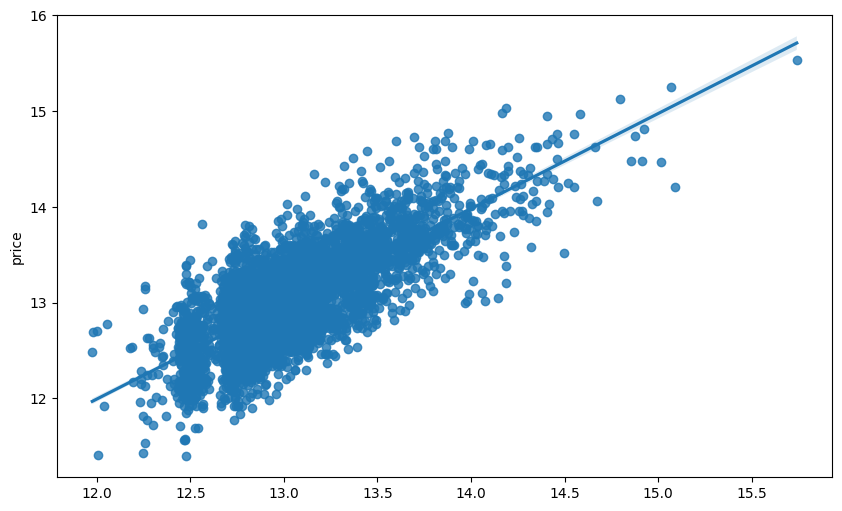

In [84]:
prediction1 = LinearRegression1.predict(X_test1)
printStatisctics(y_test1,prediction1)
accuracy = LinearRegression1.score(X_test1,y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [86]:
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
lat             0.449
view            0.347
bedrooms        0.344
sqft_basement   0.317
floors          0.311
zipcode_98004   0.223
Name: price, dtype: float64

In [90]:
main_features2=['grade','sqft_living','sqft_living15','sqft_above','bathrooms','lat','view','bedrooms','sqft_basement','floors','zipcode_98004']
X2=train_data[main_features2]
y2=train_data.price

In [91]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)


# Complex Linear Refression (with more features)


In [93]:
LinearRegression2=linear_model.LinearRegression()
LinearRegression2.fit(X_train2,y_train2)

LinearRegression()

Mean squared error : 0.06794014494791947
Root mean squared logarithmic error : 0.26065330411855414
R-squeared value : 0.7460806687809538


'accuracy : 75%'

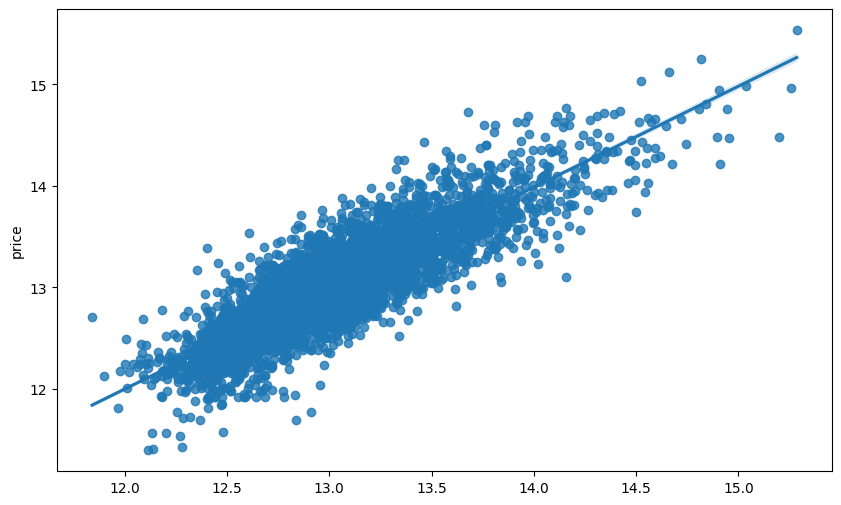

In [97]:
prediction2 = LinearRegression2.predict(X_test2)
accuracy = LinearRegression2.score(X_test2, y_test2)
printStatistics(y_test2,prediction2)
"accuracy : {}%".format(int(round(accuracy *100)))

Mean squared error : 0.06794013905661897
Root mean squared logarithmic error : 0.260653292817526
R-squeared value : 0.746080690799086


'Accuracy: 75%'

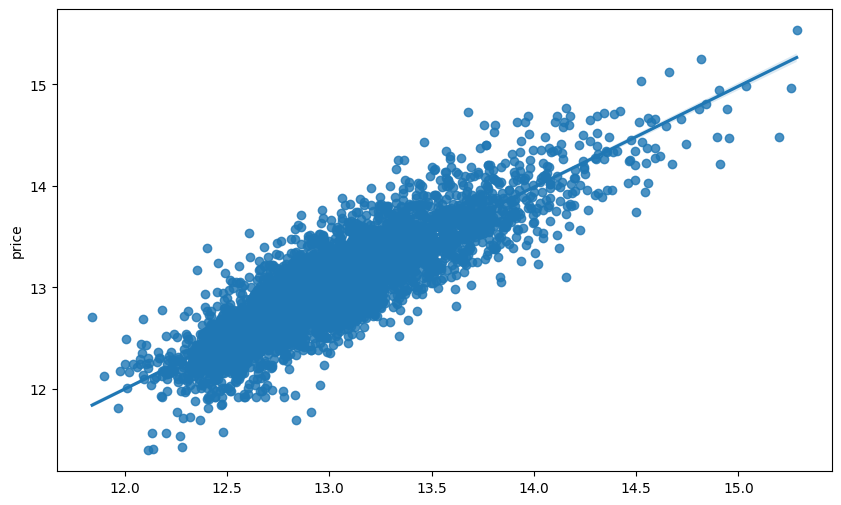

In [104]:
ridgeReg = Ridge(alpha=0.01)
ridgeReg.fit(X_train2,y_train2)
predictions3 = ridgeReg.predict(X_test2)
printStatistics(y_test2,predictions3)
accuracy = ridgeReg.score(X_test2, y_test2)
"Accuracy: {}%".format(int(round(accuracy * 100)))

5 Lasso Regression

Mean squared error : 0.07692991415924942
Root mean squared logarithmic error : 0.2773624238415316
R-squeared value : 0.7124823273628675


'Accuracy: 71%'

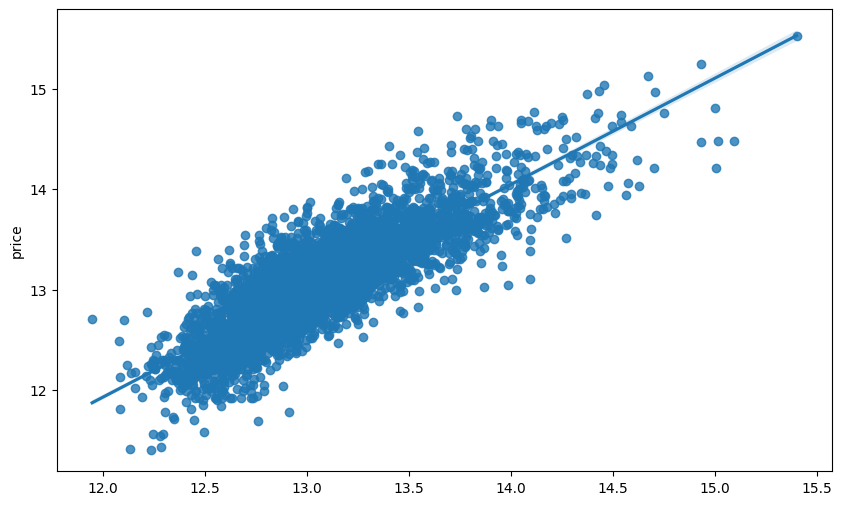

In [107]:
lasso = Lasso(alpha=0.01)
lassoModel=lasso.fit(X_train2,y_train2)
predictions_lasso = lassoModel.predict(X_test2)
printStatistics(y_test2,predictions_lasso)
accuracy = lassoModel.score(X_test2, y_test2)
"Accuracy: {}%".format(int(round(accuracy * 100)))